## Notebook Overview

- import relevant modules, packages and models 


### Model Preperation
- split into test and train data 
- adding more stopwords 
- Setting up preprocessor pipeline

### Preprocessor Setup
- building dictionary so results are formated correctly
- Function for building model

### Models used: 
- TF-IDF Logistic Regression 
-  Count Vectorized Logistic Regression
- TF-IDF Logistic Ridge
- Count Vectorized Logistic Ridge
- TD-IDF Decision Tree Classifier
- Count Vectorized Decision Tree Classifier
- TF-IDF Support Vector Classifier
- Count Vectorized Support Vector Classifier
- TF-IDF Random Forest
- Count Vectorized Random Forest
- TF - IDF Naive Bayes
- Count Vectorized Naive Bayes



In [14]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler

from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score


In [2]:
df_clean3 = pd.read_csv(r"C:\Users\tonym\Documents\Flatiron\phase_5\capstone\MBTI-ML-Social-Media-\data\df_clean3.csv")

In [3]:
df_clean3.head(1)

,type,Extrovert,Sensing,Thinking,Judging,posts,cleaned posts,compound_sentiment,positive_sent,negative_sent,...,colons,emojis,word_counts,unique_words,upper_case,link_counts,ellipses_count,image_count,post_var,avg_word_count
0,INFJ,0,0,0,1,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and moments sportscenter not top ten p...,0.9826,0.178,0.113,...,0.14,0.04,11.56,7.52,0.26,0.48,0.14,0.14,135.29,0.2312


In [4]:
# checking columns 
for col in df_clean3.columns:
    print(col)

type
Extrovert
Sensing
Thinking
Judging
posts
cleaned posts
compound_sentiment
positive_sent
negative_sent
neutral_sent
tag_posts
tagged_words
POS_UH_mean
POS_UH_std
POS_JJ_mean
POS_JJ_std
POS_WP$_mean
POS_WP$_std
POS_PDT_mean
POS_PDT_std
POS_TO_mean
POS_TO_std
POS_VB_mean
POS_VB_std
POS_NNP_mean
POS_NNP_std
POS_RP_mean
POS_RP_std
POS_VBP_mean
POS_VBP_std
POS_WP_mean
POS_WP_std
POS_NN_mean
POS_NN_std
POS_DT_mean
POS_DT_std
POS_(_mean
POS_(_std
POS_IN_mean
POS_IN_std
POS_JJR_mean
POS_JJR_std
POS_VBD_mean
POS_VBD_std
POS_EX_mean
POS_EX_std
POS_''_mean
POS_''_std
POS_SYM_mean
POS_SYM_std
POS_CD_mean
POS_CD_std
POS_#_mean
POS_#_std
POS_$_mean
POS_$_std
POS_LS_mean
POS_LS_std
POS_:_mean
POS_:_std
POS_PRP$_mean
POS_PRP$_std
POS_NNS_mean
POS_NNS_std
POS_RBR_mean
POS_RBR_std
POS_POS_mean
POS_POS_std
POS_VBN_mean
POS_VBN_std
POS_WDT_mean
POS_WDT_std
POS_MD_mean
POS_MD_std
POS_,_mean
POS_,_std
POS_CC_mean
POS_CC_std
POS_VBG_mean
POS_VBG_std
POS_WRB_mean
POS_WRB_std
POS_JJS_mean
POS_JJS_std
POS_`

## Model Preparation

### Splitting into predictors and target variable

In [5]:
X = df_clean3[
    ["cleaned posts",
     "compound_sentiment",
     "ADJ_avg",
     "ADP_avg",
     "ADV_avg",
     "CONJ_avg",
     "DET_avg",
     "NOUN_avg",
     "NUM_avg",
     "PRT_avg",     
     "PRON_avg",
     "VERB_avg",
     "ques marks",
     "exc points",     
     "colons",
     "emojis",
     "word_counts",
     "unique_words",
     "upper_case",
     "link_counts",
     "ellipses_count",
     "image_count",   
        
    ]
]
# setting up 4 target classes 
y = df_clean3.iloc[:, 1:5]

In [6]:
print(X.shape)

(8675, 22)


In [7]:
print(y.shape)

(8675, 4)


In [8]:
df_clean3.dtypes

type               object
Extrovert           int64
Sensing             int64
Thinking            int64
Judging             int64
                   ...   
link_counts       float64
ellipses_count    float64
image_count       float64
post_var          float64
avg_word_count    float64
Length: 127, dtype: object

In [9]:
more_stopwords = [
    "hey","hello",'enfps','entps','infps','infjs','ne','enfjs','intps','ni','entjs','intjs','estps','isfps','istps',
    'isfjs','infps','infjs','se','enfps','si','intps','esfjs','intjs','entps','istjs','estps','ne','infps','infjs',
    'intps','intjs','entps','enfps','nt','ti','istjs','infjs','infps','intjs','ni','intps','entps','ne','istps','enfps',
    'isfjs','fi','fe','istjs','sx','ha','anime','perc','xd','hahaha','estjs','sp','lol','jawz','mbti','sj','nf','yo'
    'hsp'
    
]

### Preprocessor Set Up 

In [10]:
# selecting best columns and features from counts and scores as well as vectorizing words 
counts_and_scores = [
     "compound_sentiment",
     "ADJ_avg",
     "ADP_avg",
     "ADV_avg",
     "CONJ_avg",
     "DET_avg",
     "NOUN_avg",
     "NUM_avg",     
     "PRT_avg",
     "PRON_avg",
     "VERB_avg",
     "ques marks",
     "exc points",     
     "colons",
     "emojis",
     "word_counts",
     "unique_words",
     "upper_case",
     "link_counts",
     "ellipses_count",
     "image_count",   
] 
# selecting best features from features other than words
best_features = make_pipeline(MinMaxScaler(), SelectKBest(f_classif, k = 10))

# preprocesor for TF-IDF vectorizer 
preprocesser_tf = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            TfidfVectorizer(min_df=25, max_df=0.85 , stop_words = more_stopwords),
            "cleaned posts",
        ),
        ("selectbest", best_features, counts_and_scores),
    ],
    remainder="passthrough",
)

# preprocessing for Count vectorizer 
preprocesser_ct = ColumnTransformer(
    transformers=[
        (
            "ct_vect",
            CountVectorizer(min_df=25, max_df=0.85, stop_words = more_stopwords),
            "cleaned posts",
        ),
        ("selectbest", best_features, counts_and_scores),
    ],
    remainder="passthrough",
)

### Modelling Function 

In [11]:
# dictionary to print scores 
mbti_type = {
    "Extrovert": "Extrovert vs Introvert",
    "Sensing": "Sensing vs Intuition",
    "Thinking": "Thinking vs Feeling",
    "Judging": "Judging vs Perceiving",
}

In [12]:
def build_model(model, X, target , vectorizer_name):
    
    for col in target.columns:
        
        print(f"\n{mbti_type[col]}")
        target = y[col]       
        
        X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3,
                                                            random_state = 50, stratify = target)
              
        #training model 
        model.fit(X_train, y_train)
              
        # y_hat 
        y_pred = model.predict(X_test)      
              
        # y_probablity 
        y_prob = model.predict_proba(X_test)[:, 1]
              
        #precision recall score 
        average_precision = average_precision_score(y_test, y_prob)
        
        # model evaluation       
        print(
            f"Geometric Mean Score:{geometric_mean_score(y_test, y_pred, average='weighted'):.2f}"
        )
        print(f"ROC-AUC Score:{roc_auc_score(y_test, y_prob):.2f}")
        print(f"Average Precision-Recall Score:{average_precision:.2f}")             
        print(classification_report_imbalanced(y_test, y_pred))     
              

### TF - IDF Logistic Regression 

In [13]:
# increased max iterations to reduce warnings but still got some messages 
import warnings
warnings.filterwarnings('ignore')

In [18]:
tfidf_log_regression = imb_make_pipeline(
  preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV(random_state = 42, max_iter = 400 )
)
build_model(tfidf_log_regression, X, y, "tfidf")



Extrovert vs Introvert
Geometric Mean Score:0.68
ROC-AUC Score:0.73
Average Precision-Recall Score:0.44
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.70      0.65      0.78      0.68      0.46      2003
          1       0.40      0.65      0.70      0.49      0.68      0.45       600

avg / total       0.76      0.69      0.66      0.71      0.68      0.46      2603


Sensing vs Intuition
Geometric Mean Score:0.69
ROC-AUC Score:0.76
Average Precision-Recall Score:0.37
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.68      0.70      0.79      0.69      0.48      2244
          1       0.26      0.70      0.68      0.38      0.69      0.48       359

avg / total       0.84      0.69      0.70      0.73      0.69      0.48      2603


Thinking vs Feeling
Geometric Mean Score:0.79
ROC-AUC Score:0.87
Average Precision-Recall Score:0.83
                   p

### Count Vectorized Logistic Regression 

In [19]:
ct_log_regression = imb_make_pipeline(
  preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV(random_state = 42, max_iter = 400)
)
build_model(ct_log_regression, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score:0.64
ROC-AUC Score:0.69
Average Precision-Recall Score:0.40
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.66      0.62      0.74      0.64      0.41      2003
          1       0.35      0.62      0.66      0.45      0.64      0.41       600

avg / total       0.74      0.65      0.63      0.68      0.64      0.41      2603


Sensing vs Intuition
Geometric Mean Score:0.66
ROC-AUC Score:0.73
Average Precision-Recall Score:0.31
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.62      0.70      0.75      0.66      0.43      2244
          1       0.23      0.70      0.62      0.35      0.66      0.44       359

avg / total       0.83      0.63      0.69      0.69      0.66      0.43      2603


Thinking vs Feeling
Geometric Mean Score:0.78
ROC-AUC Score:0.85
Average Precision-Recall Score:0.82
                   p

### TF-IDF Logistic Ridge 

In [20]:
tfidf_log_regression_ridge = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV(penalty='l2', solver='saga',
                                                                random_state = 42, max_iter = 400 )
)
build_model(tfidf_log_regression_ridge, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score:0.69
ROC-AUC Score:0.74
Average Precision-Recall Score:0.45
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.69      0.68      0.78      0.69      0.47      2003
          1       0.40      0.68      0.69      0.50      0.69      0.47       600

avg / total       0.77      0.69      0.68      0.71      0.69      0.47      2603


Sensing vs Intuition
Geometric Mean Score:0.69
ROC-AUC Score:0.75
Average Precision-Recall Score:0.33
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.67      0.71      0.78      0.69      0.48      2244
          1       0.26      0.71      0.67      0.38      0.69      0.48       359

avg / total       0.84      0.68      0.71      0.73      0.69      0.48      2603


Thinking vs Feeling
Geometric Mean Score:0.79
ROC-AUC Score:0.87
Average Precision-Recall Score:0.83
                   p

### Count Vectorized Logistic Ridge 

In [21]:
ct_log_regression_ridge = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV(penalty='l2', solver='saga',
                                                                random_state = 42, max_iter = 400 )
)
build_model(ct_log_regression_ridge, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score:0.64
ROC-AUC Score:0.70
Average Precision-Recall Score:0.40
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.67      0.62      0.75      0.64      0.42      2003
          1       0.36      0.62      0.67      0.45      0.64      0.41       600

avg / total       0.74      0.66      0.63      0.68      0.64      0.41      2603


Sensing vs Intuition
Geometric Mean Score:0.65
ROC-AUC Score:0.72
Average Precision-Recall Score:0.29
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.68      0.63      0.78      0.65      0.43      2244
          1       0.24      0.63      0.68      0.35      0.65      0.43       359

avg / total       0.83      0.67      0.64      0.72      0.65      0.43      2603


Thinking vs Feeling
Geometric Mean Score:0.78
ROC-AUC Score:0.85
Average Precision-Recall Score:0.81
                   p

### TD-IDF Decision Tree Classifier 

In [22]:
tfidf_dt = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), DecisionTreeClassifier(random_state = 42)
)
build_model(tfidf_dt, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score:0.54
ROC-AUC Score:0.54
Average Precision-Recall Score:0.25
                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      0.54      0.55      0.65      0.54      0.30      2003
          1       0.26      0.55      0.54      0.35      0.54      0.30       600

avg / total       0.68      0.54      0.54      0.58      0.54      0.30      2603


Sensing vs Intuition
Geometric Mean Score:0.53
ROC-AUC Score:0.53
Average Precision-Recall Score:0.15
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.52      0.54      0.66      0.53      0.28      2244
          1       0.15      0.54      0.52      0.24      0.53      0.29       359

avg / total       0.78      0.53      0.54      0.60      0.53      0.28      2603


Thinking vs Feeling
Geometric Mean Score:0.60
ROC-AUC Score:0.60
Average Precision-Recall Score:0.52
                   p

### Count Vectorized Decision Tree Classifier 

In [23]:
cv_dt = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), DecisionTreeClassifier(random_state = 42)
)
build_model(cv_dt, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score:0.55
ROC-AUC Score:0.55
Average Precision-Recall Score:0.25
                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      0.53      0.57      0.64      0.55      0.30      2003
          1       0.27      0.57      0.53      0.36      0.55      0.30       600

avg / total       0.68      0.54      0.56      0.58      0.55      0.30      2603


Sensing vs Intuition
Geometric Mean Score:0.53
ROC-AUC Score:0.53
Average Precision-Recall Score:0.15
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.56      0.51      0.68      0.53      0.29      2244
          1       0.16      0.51      0.56      0.24      0.53      0.28       359

avg / total       0.78      0.55      0.52      0.62      0.53      0.28      2603


Thinking vs Feeling
Geometric Mean Score:0.59
ROC-AUC Score:0.59
Average Precision-Recall Score:0.52
                   p

## TF-IDF Support Vector Classifier

In [24]:
tfidf_SVC = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), SVC(random_state = 42, kernel = 'linear', probability = True)
)
build_model(tfidf_SVC, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score:0.67
ROC-AUC Score:0.72
Average Precision-Recall Score:0.43
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.70      0.64      0.78      0.67      0.45      2003
          1       0.39      0.64      0.70      0.49      0.67      0.45       600

avg / total       0.76      0.69      0.66      0.71      0.67      0.45      2603


Sensing vs Intuition
Geometric Mean Score:0.67
ROC-AUC Score:0.73
Average Precision-Recall Score:0.32
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.65      0.69      0.77      0.67      0.45      2244
          1       0.24      0.69      0.65      0.36      0.67      0.45       359

avg / total       0.83      0.66      0.68      0.71      0.67      0.45      2603


Thinking vs Feeling
Geometric Mean Score:0.79
ROC-AUC Score:0.86
Average Precision-Recall Score:0.83
                   p

##  Count Vectorized Support Vector Classifier 

In [25]:
cv_SVC = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), SVC(random_state = 42, kernel = 'linear', probability = True)
)
build_model(cv_SVC, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score:0.67
ROC-AUC Score:0.73
Average Precision-Recall Score:0.43
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.69      0.64      0.77      0.66      0.44      2003
          1       0.38      0.64      0.69      0.48      0.66      0.44       600

avg / total       0.75      0.68      0.65      0.70      0.66      0.44      2603


Sensing vs Intuition
Geometric Mean Score:0.69
ROC-AUC Score:0.75
Average Precision-Recall Score:0.34
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.66      0.72      0.78      0.69      0.48      2244
          1       0.26      0.72      0.66      0.38      0.69      0.48       359

avg / total       0.84      0.67      0.71      0.72      0.69      0.48      2603


Thinking vs Feeling
Geometric Mean Score:0.78
ROC-AUC Score:0.86
Average Precision-Recall Score:0.83
                   p

### TF-IDF Random Forest

In [26]:
tfidf_rf = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), RandomForestClassifier(random_state = 42, max_depth = 10)
)
build_model(tfidf_rf, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score:0.62
ROC-AUC Score:0.66
Average Precision-Recall Score:0.35
                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.62      0.62      0.71      0.62      0.38      2003
          1       0.32      0.62      0.62      0.43      0.62      0.38       600

avg / total       0.72      0.62      0.62      0.65      0.62      0.38      2603


Sensing vs Intuition
Geometric Mean Score:0.60
ROC-AUC Score:0.66
Average Precision-Recall Score:0.23
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.59      0.62      0.71      0.60      0.36      2244
          1       0.19      0.62      0.59      0.30      0.60      0.37       359

avg / total       0.81      0.59      0.61      0.66      0.60      0.36      2603


Thinking vs Feeling
Geometric Mean Score:0.71
ROC-AUC Score:0.78
Average Precision-Recall Score:0.73
                   p

### Count Vectorized Random Forest 

In [27]:
cv_rf = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), RandomForestClassifier(random_state = 42, max_depth = 10)
)
build_model(cv_rf, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score:0.63
ROC-AUC Score:0.68
Average Precision-Recall Score:0.37
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.64      0.62      0.73      0.63      0.40      2003
          1       0.34      0.62      0.64      0.44      0.63      0.40       600

avg / total       0.73      0.63      0.63      0.66      0.63      0.40      2603


Sensing vs Intuition
Geometric Mean Score:0.63
ROC-AUC Score:0.69
Average Precision-Recall Score:0.26
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.58      0.69      0.71      0.63      0.40      2244
          1       0.21      0.69      0.58      0.32      0.63      0.41       359

avg / total       0.82      0.59      0.68      0.66      0.63      0.40      2603


Thinking vs Feeling
Geometric Mean Score:0.73
ROC-AUC Score:0.79
Average Precision-Recall Score:0.74
                   p

## TF - IDF Naive Bayes 

In [16]:
tfidf_nb = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), MultinomialNB()
)
build_model(tfidf_nb, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score:0.67
ROC-AUC Score:0.73
Average Precision-Recall Score:0.42
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.63      0.72      0.73      0.67      0.45      2003
          1       0.37      0.72      0.63      0.48      0.67      0.45       600

avg / total       0.76      0.65      0.70      0.68      0.67      0.45      2603


Sensing vs Intuition
Geometric Mean Score:0.70
ROC-AUC Score:0.76
Average Precision-Recall Score:0.35
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.72      0.69      0.81      0.70      0.50      2244
          1       0.28      0.69      0.72      0.40      0.70      0.50       359

avg / total       0.85      0.71      0.70      0.75      0.70      0.50      2603


Thinking vs Feeling
Geometric Mean Score:0.75
ROC-AUC Score:0.84
Average Precision-Recall Score:0.78
                   p

## Count Vectorized Naive Bayes 

## Results

The TF-IDF Logistic Regression performed better on Average Precision Recall then most of the other models. The worst model by far was the Decision Tree Classifer which may have had to be tuned better. I don't believe it's worth it to try to get that model higher as most of the other models already have higher untuned scores. I will go ahead with the Tf-IDF logistic Regression as our final model. None of the models performed very well on the Extroversion vs Introvert and Sensing v Intuition 

### TF-IDf Logistic Regression results 

#### Extrovert vs Introvert

Geometric Mean Score:0.69

ROC-AUC Score:0.74

Average Precision-Recall Score:0.45


#### Thinking vs Feeling

Geometric Mean Score:0.79

ROC-AUC Score:0.87

Average Precision-Recall Score:0.83


#### Sensing vs Intuition

Geometric Mean Score:0.69

ROC-AUC Score:0.76

Average Precision-Recall Score:0.37

#### Judging vs Perceiving

Geometric Mean Score:0.63

ROC-AUC Score:0.67

Average Precision-Recall Score:0.55




## Final Model 

We can now train it on on our entire datatset.


Extrovert vs Introvert
              coef
word              
fun       4.166195
bored     3.531274
mind     -2.868488
games    -2.864104
family   -2.832853
friends   2.679862
fucking   2.675458
crazy     2.504728
quiet    -2.447162
new       2.431916
business  2.409307
term      2.331531
super     2.300975
small    -2.296636
dream    -2.260396
show      2.222053
yeah      2.213749
both      2.213714
guys      2.172592
try      -2.108699
yourself  2.057933

Sensing vs Intuition
                coef
word                
world      -2.550439
science    -2.474393
sounds      2.397602
rant        2.268407
usually     2.255763
nts        -2.162298
human      -2.026835
rave        1.966961
fun         1.916832
thanks      1.916353
yet        -1.903583
yes        -1.885948
feel       -1.851957
dont        1.777281
philosophy -1.766491
enneagram   1.757157
romance    -1.743062
pretty      1.727526
debate     -1.696236
such       -1.694485
need        1.684353

Thinking vs Feeling
             

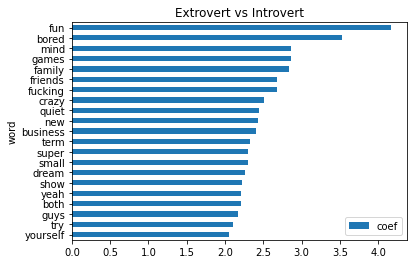

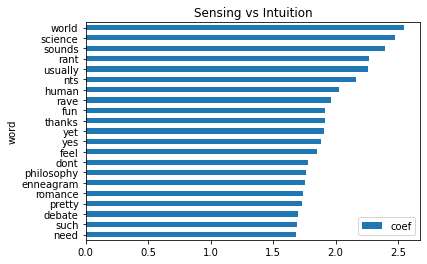

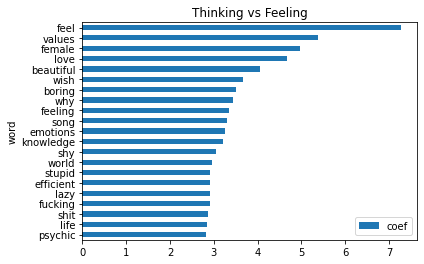

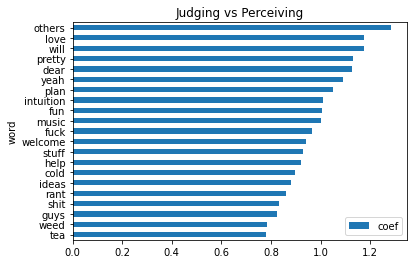

In [15]:
for col in y.columns:
    print(f"\n{mbti_type[col]}")
    target = y[col]       


    tfidf_log_regression = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV(random_state = 42, max_iter = 400 )
    )
    
    # training the data on whole set
    tfidf_log_regression.fit(X, target)
    
    # feature importance   
    coef = tfidf_log_regression[-1].coef_[0]  
    word = tfidf_log_regression[0].named_transformers_["tfidf"].get_feature_names()
    word_list = list(zip(word, coef))         
    result = pd.DataFrame(word_list, columns=["word", "coef"]).set_index("word")    
    result = result.reindex(result.coef.abs().sort_values(ascending=False).index)[0:21]
    print(result)
    
    # plotting feature importance
    result["coef"] = result["coef"].apply(lambda x: abs(x))
    result.sort_values("coef", inplace=True)
    result.plot(kind="barh", title=mbti_type[col])

    